# Matplotlib Formatting Charts

In [7]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

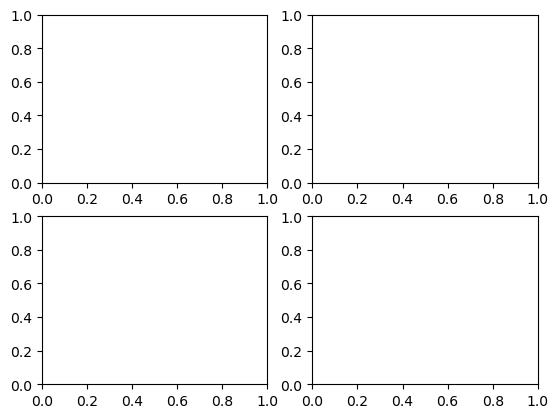

In [11]:
fig, ax = plt.subplots(2,2)



<Axes: xlabel='job_title_short'>

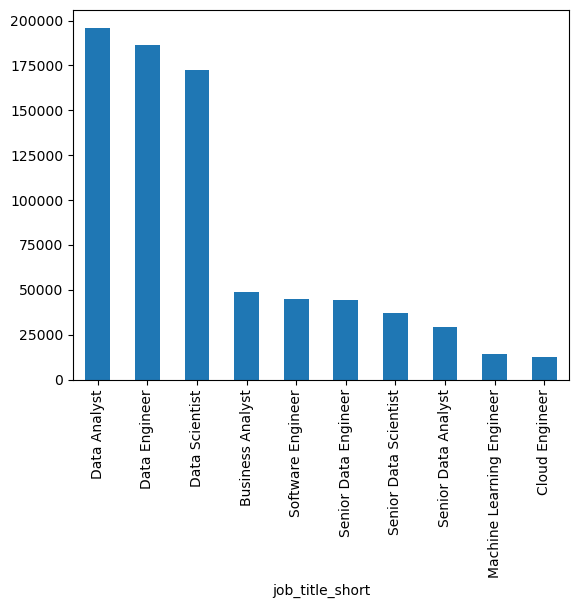

In [12]:
fig, ax = plt.subplots()
df['job_title_short'].value_counts().plot(kind='bar', ax=ax)

In [13]:
df['job_schedule_type'].value_counts().head(3)

job_schedule_type
Full-time     701727
Contractor     34793
Internship      8742
Name: count, dtype: int64

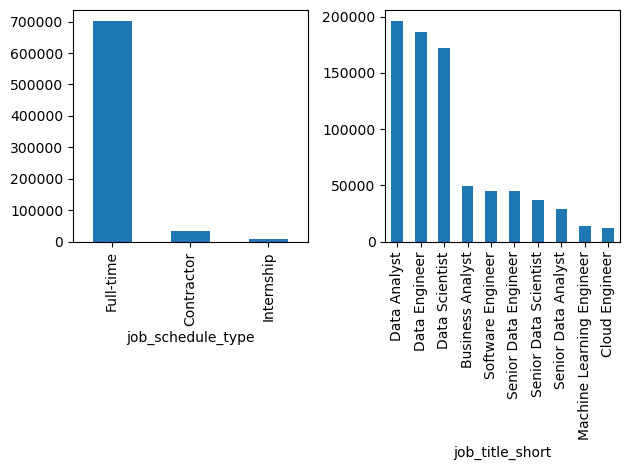

In [16]:
fig, ax = plt.subplots(1,2)

df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[0])
df['job_title_short'].value_counts().plot(kind='bar', ax=ax[1])

fig.tight_layout()

# Example - Counts of Top Skills in Job Postings

In [17]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count',ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


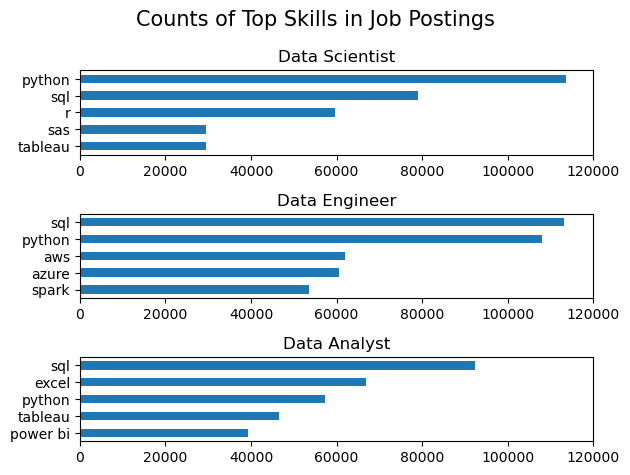

In [36]:
job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']
fig, ax = plt.subplots(3,1)

for i , job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,120000)

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
fig.tight_layout()

# Subplot with Bar Chart

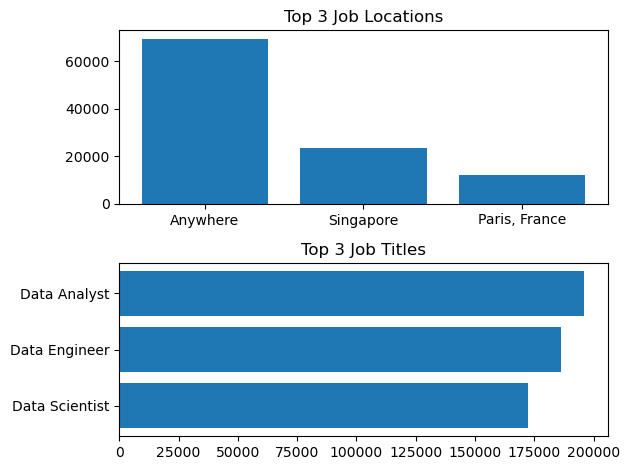

In [55]:
fig, ax= plt.subplots(2,1)

# Top 3 job locations
job_locations = df['job_location'].value_counts().head(3)
ax[0].bar(job_locations.index, job_locations.values)
ax[0].set_title('Top 3 Job Locations')

# Top 3 job titles
job_titles = df['job_title_short'].value_counts().head(3)
ax[1].barh(job_titles.index, job_titles.values)
ax[1].set_title('Top 3 Job Titles')
ax[1].invert_yaxis()

fig.tight_layout()

# Subplots with Job Titles by Schedule

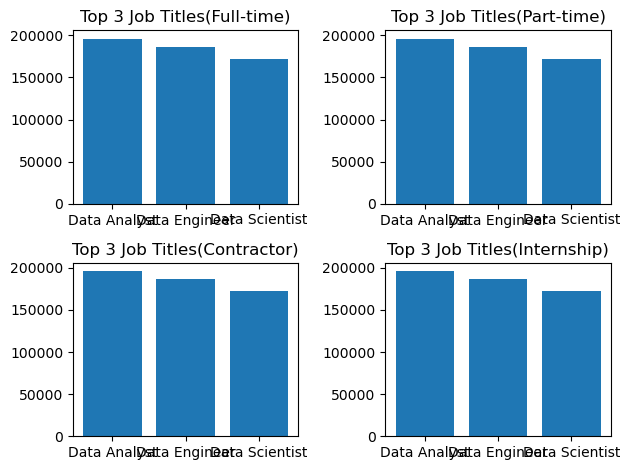

In [199]:
fig, ax = plt.subplots(2,2)

schedules = ['Full-time', 'Part-time', 'Contractor', 'Internship']


for i, schedule in enumerate(schedules):
    df_plot = df_schedule[df_schedule['job_schedule_type'] == schedule]
    job_titles = df_schedule['job_title_short'].value_counts().head(3)
    ax[i//2, i%2].bar(job_titles.index, job_titles.values)
    ax[i//2, i%2].set_title(f'Top 3 Job Titles({schedule})')

fig.tight_layout()
plt.show()

# Top Skills for Job Roles Subplots

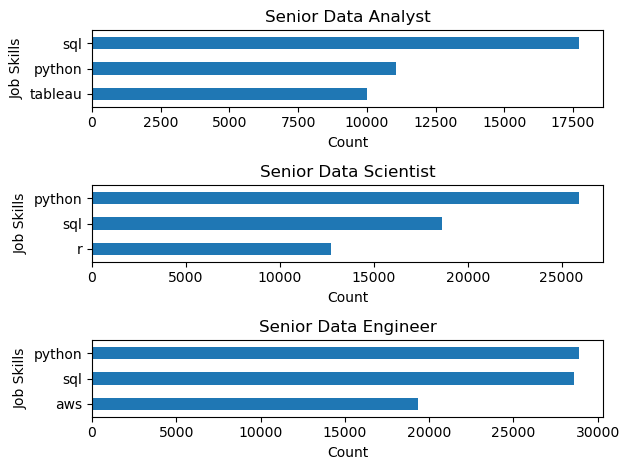

In [176]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skill_count = df_skills.groupby(['job_title_short','job_skills']).size()
df_skill_count = skill_count.reset_index(name='skill_count')
df_skill_count.sort_values(by='skill_count',ascending=False, inplace=True)

fig, ax = plt.subplots(3,1)

job_titles = ['Senior Data Analyst', 'Senior Data Scientist', 'Senior Data Engineer']

for i, job_title in enumerate(job_titles):
    df_plot = df_skill_count[df_skill_count['job_title_short'] == job_title].head(3)
    df_plot.plot(kind='barh',x='job_skills',y='skill_count',ax=ax[i],title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_xlabel('Count')
    ax[i].set_ylabel('Job Skills')
    ax[i].legend().set_visible(False)

fig.tight_layout()
plt.show()